In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [ ]:
# Read dataset
df = pd.read_csv('flights.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [ ]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 120

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#F3E8FF'}, style='darkgrid')

In [ ]:
df.isnull().sum()

,0
id,0
year,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,9430


#Data Basic Information

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['carrier', 'tailnum', 'origin', 'dest', 'time_hour', 'name'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid NaN issues
    label_encoders[col] = le  # Store the encoder for later use

df.head(5)


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,879,0,42,227.0,1400,5,15,0,6
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,3509,2,42,227.0,1416,5,29,0,6
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,1556,1,57,160.0,1089,5,40,0,8
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,2448,1,8,183.0,1576,5,45,0,15
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,1845,2,38,116.0,762,6,0,1,9


In [ ]:
print(df.dtypes[df.dtypes == 'object'])

carrier      object
tailnum      object
origin       object
dest         object
time_hour    object
name         object
dtype: object


In [ ]:
# Convert 'id' and 'flight' to object data type
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

In [ ]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0


In [ ]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,id,carrier,flight,tailnum,origin,dest,time_hour,name
count,336776,336776,336776,334264,336776,336776,336776,336776
unique,336776,16,3844,4043,3,105,6936,16
top,0,UA,15,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,1,58665,968,575,120835,17283,94,58665


#EDA and Visualization

Univariate Analysis

We can perform univariate analysis on these columns based on their datatype:

For numerical data, we can use a histogram to visualize the data distribution. The number of bins should be chosen appropriately to represent the data well.
For categorical data, we can use a bar plot to visualize the frequency of each category.

In [ ]:
# Set color for the plots
color = '#8502d1'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

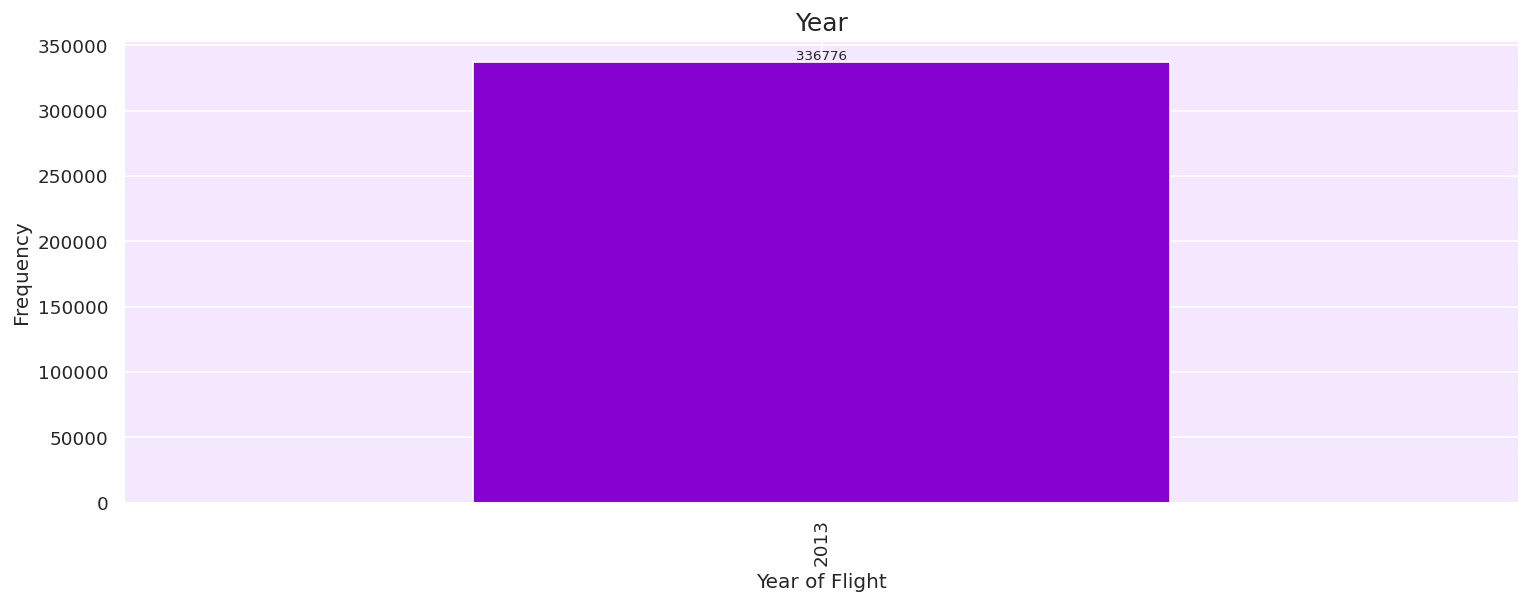

In [ ]:
# The year in which the flight took place. The dataset includes flights from the year 2013.
plot_bar(df['year'], 'Year', 'Year of Flight')

Inference:
The dataset contains flight data for only one year (2013), so the bar plot only has one bar.

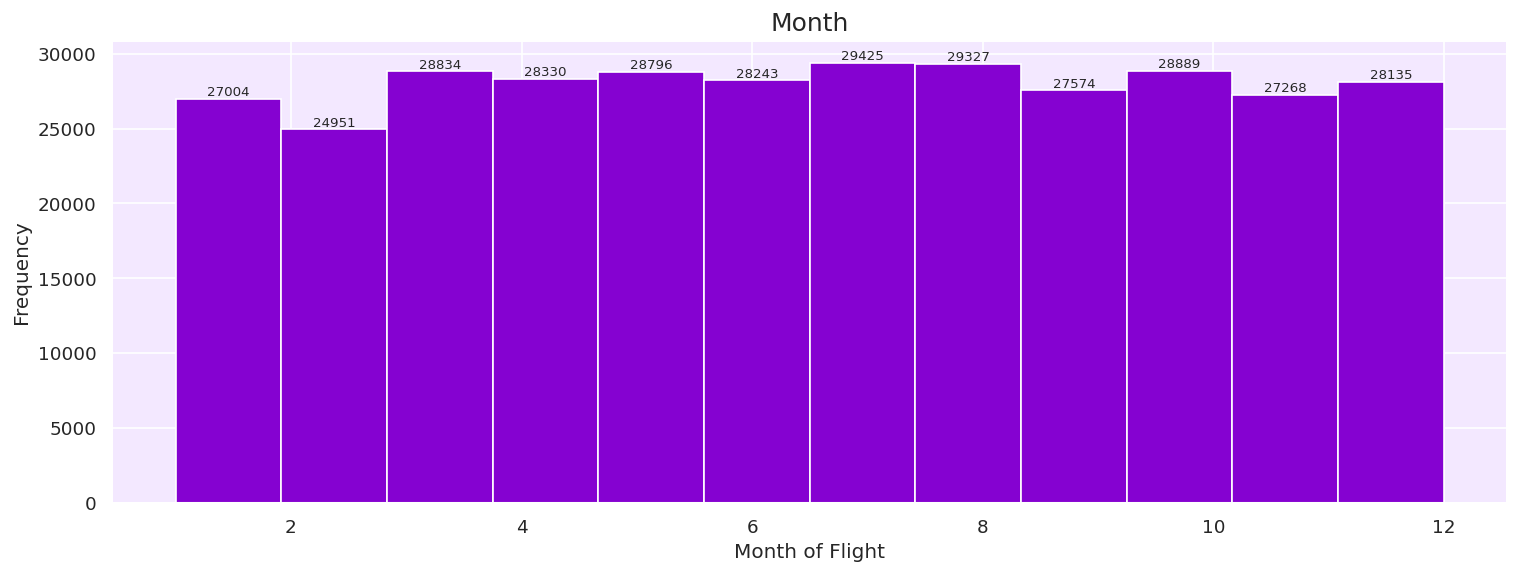

In [ ]:
# The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December).
plot_hist(df['month'], bins=12, title='Month', xlabel='Month of Flight')

The histogram shows that the distribution of flights across different months is approximately uniform, with a slight decrease in February, which is likely due to the fewer number of days in that month.

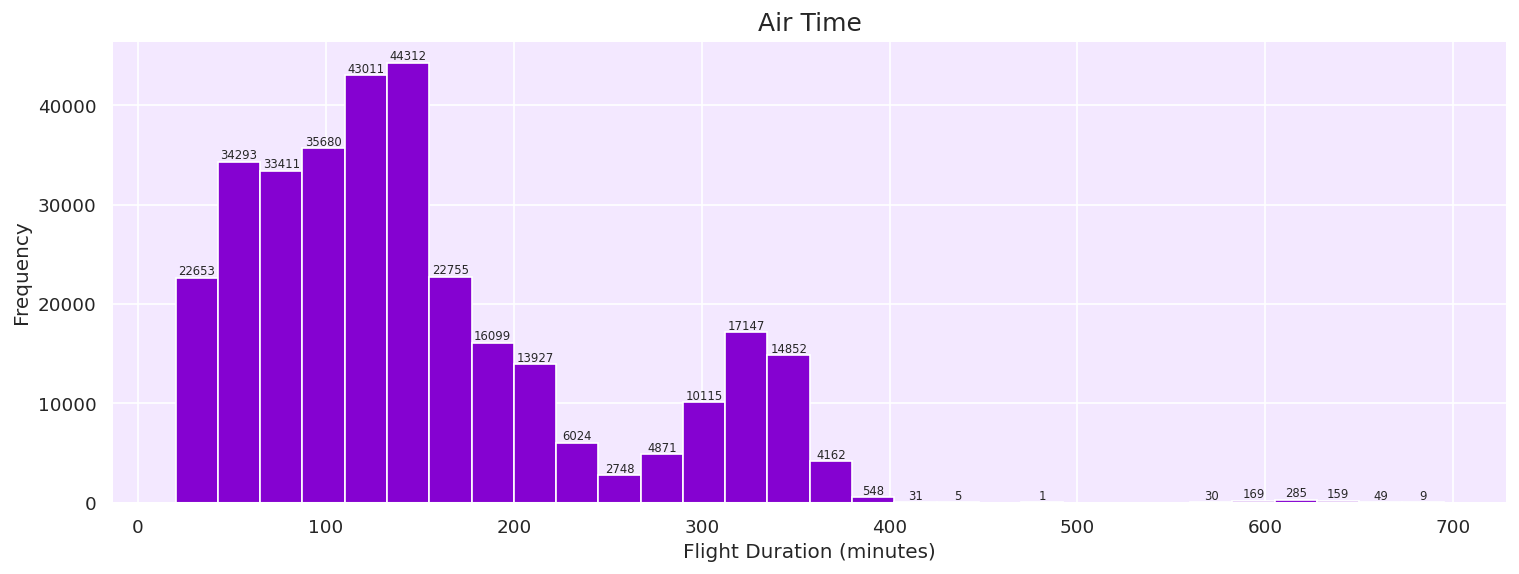

In [ ]:
# The duration of the flight, measured in minutes.
plot_hist(df['air_time'].dropna(), bins=30, title='Air Time', xlabel='Flight Duration (minutes)', fontsize=7)

Inference:
The histogram shows that most flights have an air time of around 50 to 200 minutes, with a few flights having significantly longer air times.

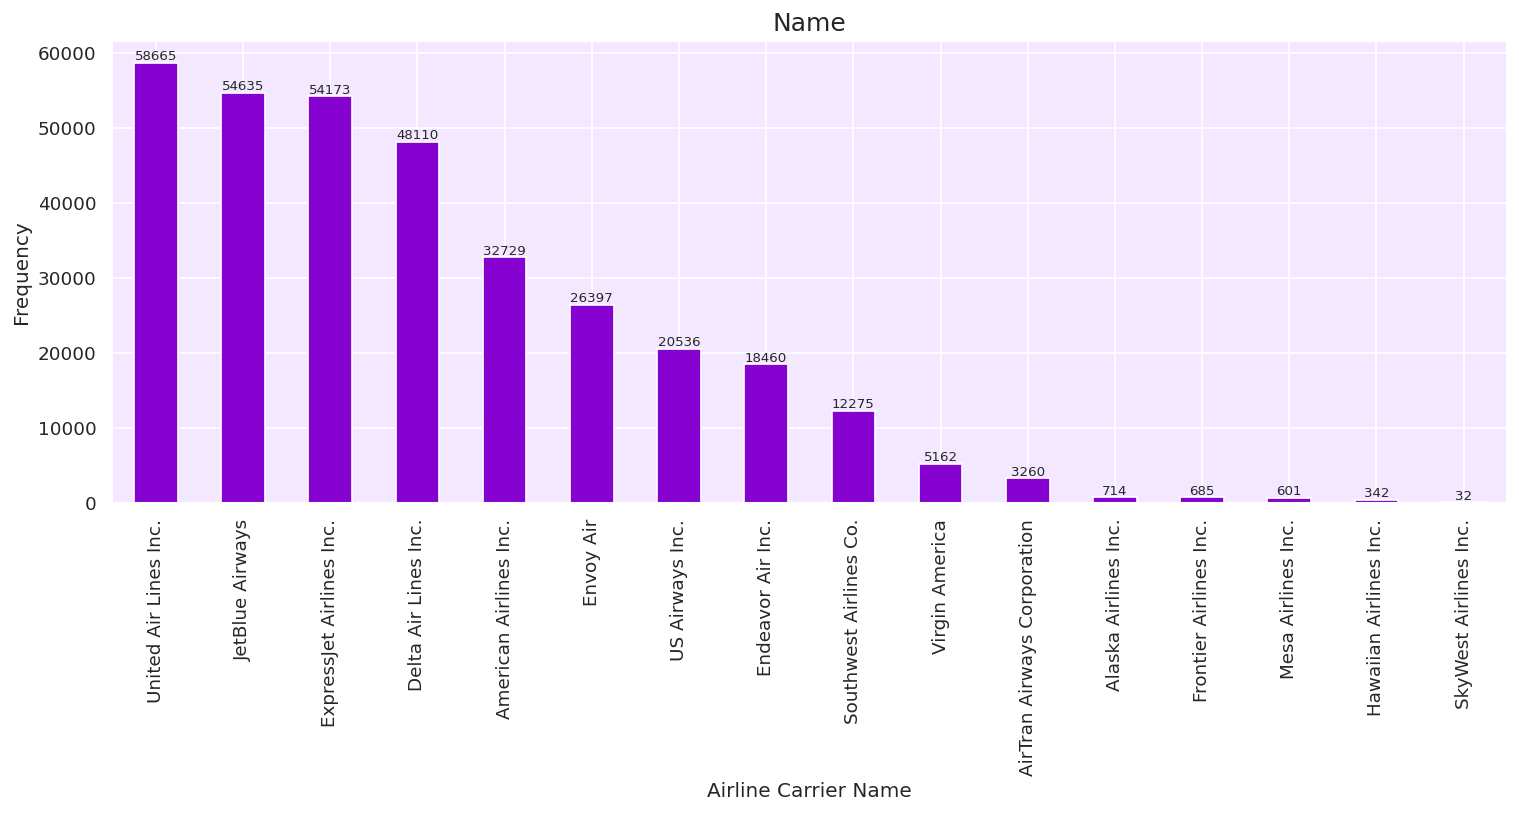

In [ ]:
# The full name of the airline carrier responsible for the flight.
plot_bar(df['name'], 'Name', 'Airline Carrier Name')

The bar plot shows that United Air Lines Inc., JetBlue Airways, and ExpressJet Airlines Inc. are the airlines that operate the most flights in this dataset.

# Data Preprocessing

In [ ]:
df.dropna(subset=['id', 'year', 'flight', 'tailnum', 'time_hour', 'minute', 'hour', 'carrier','dep_time','dep_delay','arr_delay','air_time'], inplace=True)



In [ ]:
df.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [ ]:
# Check is there any missing values
df.isnull().values.any()

False

In [ ]:
df.dropna(subset=['arr_delay'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# Separate features and target
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time', 'air_time']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check missing values again
X.isnull().sum().sum()

0

Then i am using a K-Nearest Neighbors (KNN) Imputer to fill in missing values in other columns. The KNN imputer is a more advanced imputation method that fills missing values based on similar observations, rather than just using the mean or median. This allows us to capture more complex patterns in the data, potentially leading to more accurate imputations:

In [ ]:
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time', 'air_time']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check missing values again
X.isnull().sum().sum()

0

In [ ]:
# Identify categorical columns
cat_columns = X.select_dtypes(include=['object']).columns

# Check the number of unique categories in each categorical feature
X[cat_columns].nunique()

,0
origin,3
dest,104
name,16


# Data Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=np.array([[1,2],[2,4],[3,6],[4,8],[5,10]])

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data)

In [ ]:
normalized_data

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])